In [20]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pathlib import Path

In [21]:
ROOT_PATH_DATA = r"Fake-news-detection-ny+guar+kaggle/DataSets/"

In [22]:
def preprocessing_cloumns():
    df_fake = pd.read_csv(f"{ROOT_PATH_DATA}data/fake.csv")
    df_fake.rename(columns={"published": "date"},inplace=True)
    df_fake['source'] = "kaggle"
    df_fake['class']=1
    df_fake.to_csv(f"{ROOT_PATH_DATA}data/fake.csv",index=False)
    df_ny = pd.read_csv(f"{ROOT_PATH_DATA}data/nyt_unclean.csv")
    df_ny['source']="ny"
    df_ny['class']=0
    df_ny.to_csv(f"{ROOT_PATH_DATA}data/nyt_unclean.csv",index=False)
    df_guardian = pd.read_csv(f"{ROOT_PATH_DATA}data/GuardianUncleaned.csv")
    df_guardian['source']="df_guardian"
    df_guardian['class']=0
    df_guardian.to_csv(f"{ROOT_PATH_DATA}data/GuardianUncleaned.csv",index=False)

In [30]:
def create_combined_data():
    path_data = Path(f"{ROOT_PATH_DATA}combined_data.csv")
    if not path_data.exists():
        #path_data = Path(f"C:\Users\or\PycharmProjects\NLP_TAU\Project - Fake News Detection\Fake-news-detection-ny+guar+kaggle\DataSets\data\combined_data_all.csv")
        filenames = [i for i in glob.glob(f"{ROOT_PATH_DATA}\data\*.csv")]
        combined_csv = pd.concat([pd.read_csv(f, usecols=["text","title","date","source","class"]) for f in filenames])
        combined_csv.rename(columns={'class':'label'},inplace=True)
        combined_csv.to_csv(f"{ROOT_PATH_DATA}combined_data.csv", index=False)
        combined_csv.sample(frac=0.5).to_csv(f"{ROOT_PATH_DATA}combined_data_sample.csv", index=False)

In [31]:
preprocessing_cloumns()
create_combined_data()

C:\Users\or\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [32]:
combined_csv = pd.read_csv(f"{ROOT_PATH_DATA}combined_data.csv")

In [33]:
combined_csv

,label,date,source,text,title
0,1,2016-10-26T21:41:00.000+03:00,kaggle,Print They should pay all the back all the mon...,Muslims BUSTED: They Stole Millions In Gov’t B...
1,1,2016-10-29T08:47:11.259+03:00,kaggle,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...
2,1,2016-10-31T01:41:49.479+02:00,kaggle,Red State : \nFox News Sunday reported this mo...,BREAKING: Weiner Cooperating With FBI On Hilla...
3,1,2016-11-01T05:22:00.000+02:00,kaggle,Email Kayla Mueller was a prisoner and torture...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4,1,2016-11-01T21:56:00.000+02:00,kaggle,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
...,...,...,...,...,...
44061,0,2014-04-13T00:00:00Z,ny,"Among the pioneering moguls of Hollywood, Carl...",Laemmle’s List: A Mogul’s Heroism
44062,0,2014-04-12T00:00:00Z,ny,"With Moscow bearing down, Kiev seeks an econom...",Ukraine on the Brink
44063,0,2014-04-12T00:00:00Z,ny,"Re “Bye-bye, baby” (Review, April 5) by Michae...",Birth Rates and the Environment
44064,0,2014-04-12T00:00:00Z,ny,North Korea signaled to Japan early this month...,Signals From North Korea


In [34]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44066 entries, 0 to 44065
Data columns (total 5 columns):
label     44066 non-null int64
date      44066 non-null object
source    44066 non-null object
text      43893 non-null object
title     43386 non-null object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


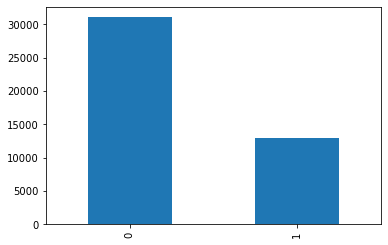

In [35]:
combined_csv['label'].value_counts().plot.bar()